#### 1. Importar librerías y .csv. (2 puntos) para ello:
- Importe las librerías básicas para el análisis de datos
- Descargue e importe el archivo nations.csv.
>Tip: El formato del archivo posee una codificación de tipo 'iso-8859-1'. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de pd.read_csv.


La base de datos contiene información a nivel mundial sobre demografía:
- country: País.
- region: Continente del país.
- gdp: Producto Interno Bruto per cápita, precios 2005.
- school: Promedio años de escolaridad.
- adfert: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
- chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.
- life: Esperanza de vida al nacer.
- pop: Población total.
- urban: Porcentaje de población urbana.
- femlab: Tasa entre hombres y mujeres en el mercado laboral.
- literacy: Tasa de alfabetismo.
- co2: Toneladas de Co2 mitidas per cápita.
- gini: Coeficiente de desigualdad del ingreso.
- Apellidos desde la A hasta la N: Enfocarse en las variables **chldmort, adfert y life.**
- Apellidos desde la M hasta la Z: Enfocarse en las variables femlab, literacy y school


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] =(10,6)
plt.rcParams["figure.dpi"] = 150

df = pd.read_csv('nations.csv',encoding ='latin1',index_col=0)
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [2]:
var_all =['country', 'region']
var_an = ['chldmort', 'adfert', 'life']
var_mz = ['femlab', 'literacy', 'school']

df_subset=df.loc[:,var_all+var_an]
#df_subset2=df.drop(var_mz)
df_subset

,country,region,chldmort,adfert,life
1,Algeria,Africa,34.75,7.300000,72.316666
2,Benin,Africa,122.75,111.699997,54.733334
3,Botswana,Africa,60.25,52.099998,52.250000
4,Burkina Faso,Africa,170.50,124.800003,53.783333
5,Burundi,Africa,168.50,18.600000,48.866665
...,...,...,...,...,...
190,Samoa,Oceania,26.75,28.299999,71.533333
191,Solomon Islands,Oceania,36.00,70.300003,66.500000
192,Tonga,Oceania,19.25,22.299999,71.833336
193,Tuvalu,Oceania,36.50,23.299999,66.033333


#### 2. Refactorizar gráficos matplotlib a seaborn (3 puntos).
A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn. Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

- Histogramas

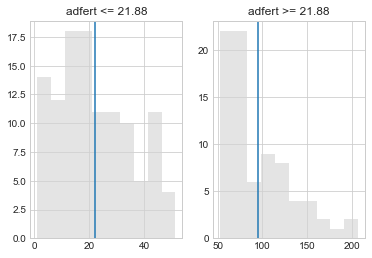

In [3]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0) # genera una columna con valores 1 o 0 segun la condicion
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna() #subset con 1 (serie)
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna() #subset con 0 (serie)
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')

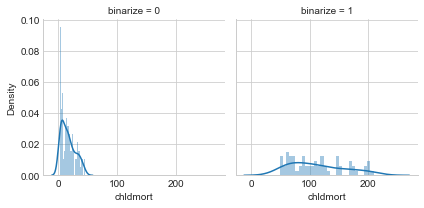

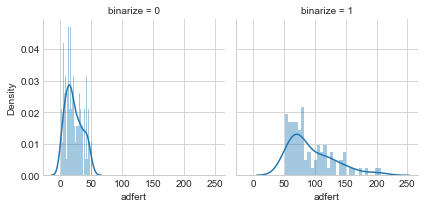

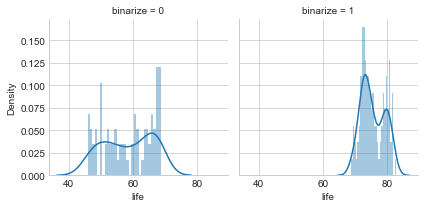

In [4]:
def binarize_histogram_se(dataframe, variable): 
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0) # genera una columna con valores 1 o 0 segun la condicion
    
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2) # un grafico por categoria
    grid.map(sns.distplot, variable, bins=30)

for i in var_an:
    binarize_histogram_se(df,i)

- Boxplots

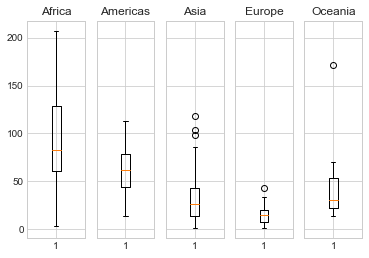

In [5]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
    
grouped_boxplot(df, 'adfert', 'region')

<AxesSubplot:xlabel='region', ylabel='adfert'>

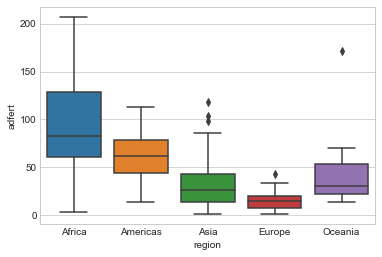

In [6]:
sns.boxplot(data=df, x='region', y='adfert')

- Scatterplots

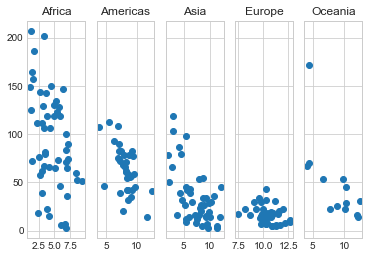

In [7]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

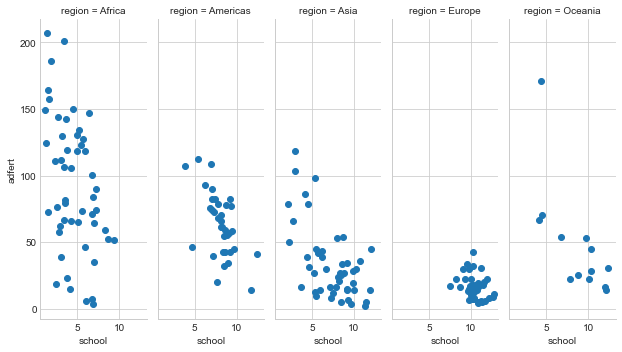

In [8]:
grid = sns.FacetGrid(df,col='region',col_wrap=5, height=5, aspect=.35)
grid.map(plt.scatter,'school','adfert')

In [9]:
#sns.scatterplot(x='school', y='adfert', data=df)

#### 3. Generar un heatmap entre todas las variables (2 puntos):
Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6


<AxesSubplot:>

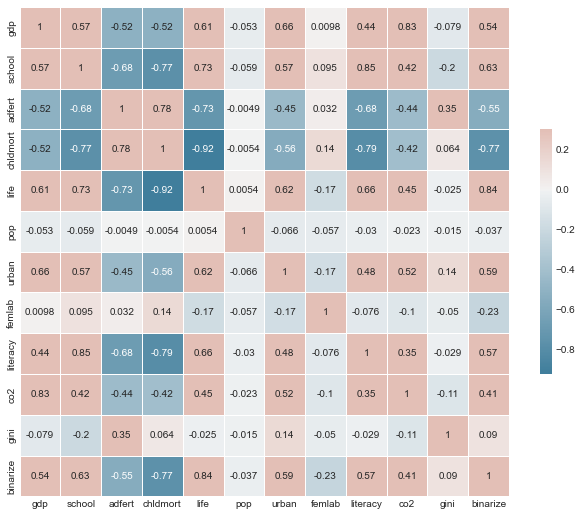

In [10]:
f, ax = plt.subplots(figsize=(11, 9)) # Tamaño
cmap = sns.diverging_palette(230, 20, as_cmap=True) #Colores Personalizados

sns.heatmap(df.corr(),cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} )

#### 4 A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
- Comente brevemente las principales correlaciones a través de las regiones.
> Tip: Genere una nueva tabla segmentando con la siguiente sintaxis: = df.loc[:,['variables', 'a', 'agregar']]. N. No olvide agregar la variable región.
> Tip: Genere un loop para recorrer cada región y generar un heatmap.


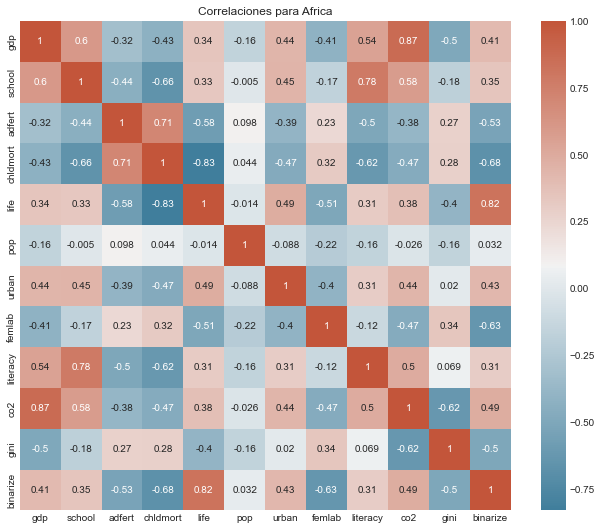

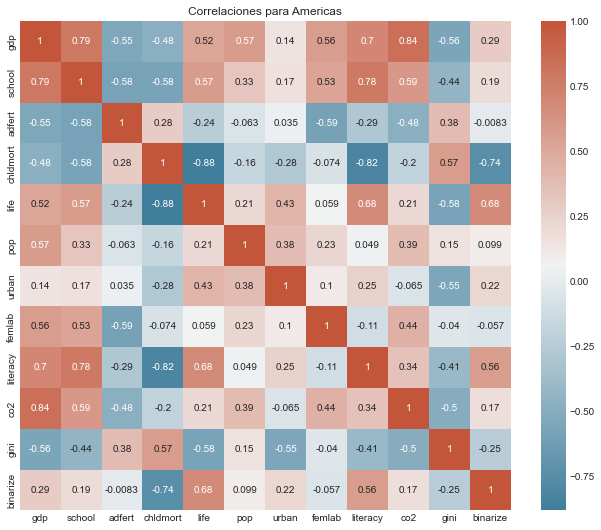

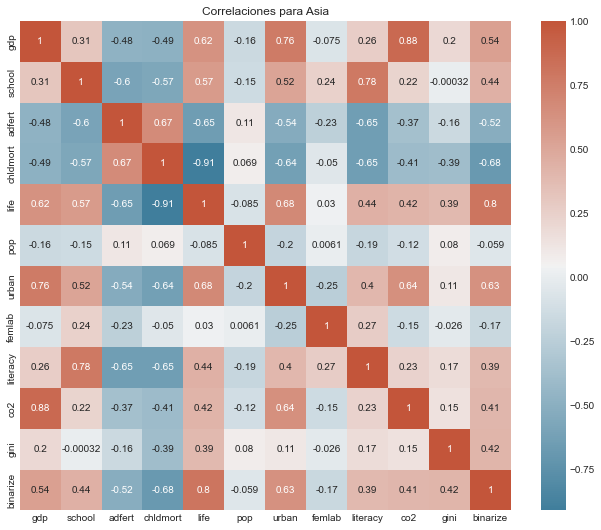

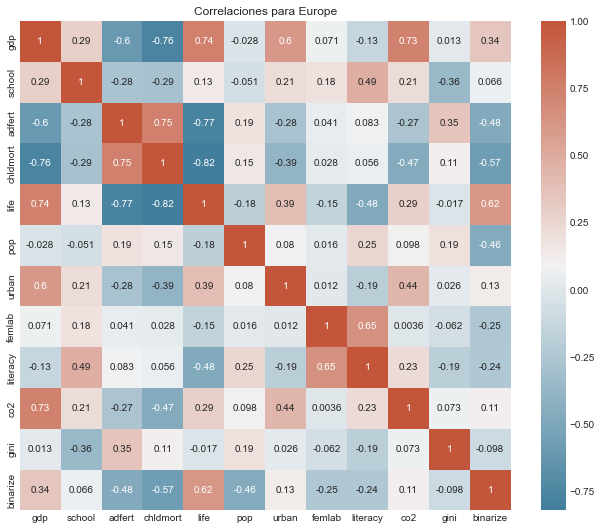

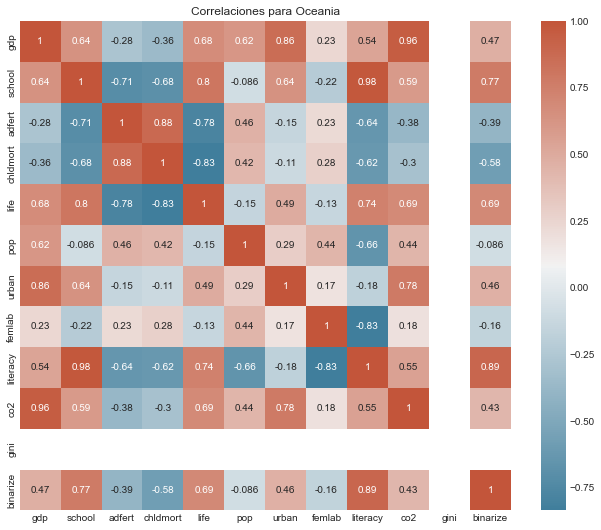

In [11]:
def correlacion_heatmap(df, var):
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    valores_unicos = df[var].unique()
    for v in valores_unicos:
        plt.figure(figsize=(11,9))
        sns.heatmap(df.loc[df[var]==v].corr(),cmap=cmap, annot=True)
        plt.title(f"Correlaciones para {v}")
        plt.show()

correlacion_heatmap(df,'region')

- Se puede apreciar una fuerte correlación entre gdp, school, life, pop, adfert. Como es de esperar en el continente de africa se encuentra una alta correlacion con childmort y gini y en Europa con pop y urban por ejemplo